In [17]:
import hvplot.pandas
import pandas as pd
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pathlib import Path

car_prices = Path("/Users/tomasecheverria/Desktop/car_prices.csv")
data = pd.read_csv(car_prices)
data.head()



,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [93]:
#Question 1

#Calculate the most popular Makes
popular_makes = data['make'].value_counts()
print("Most popular makes:")
print(popular_makes)

#Calculate the most popular Models
popular_models = data['model'].value_counts()
print("\nMost popular models:")
print(popular_models)

#Calculate the most popular Body types
popular_body = data['body'].value_counts()
print("\nMost popular body :")
print(popular_body)

Most popular makes:
make
Ford          93554
Chevrolet     60197
Nissan        53946
Toyota        39871
Dodge         30710
              ...  
airstream         1
ford tk           1
chev truck        1
hyundai tk        1
Lotus             1
Name: count, Length: 96, dtype: int64

Most popular models:
model
Altima        19349
F-150         14479
Fusion        12946
Camry         12545
Escape        11861
              ...  
rrs               1
golf              1
g500              1
tahoe             1
458 Italia        1
Name: count, Length: 973, dtype: int64

Most popular body :
body
Sedan          199437
SUV            119292
sedan           41906
suv             24552
Hatchback       21380
                ...  
cab plus 4          1
g37 coupe           1
CTS-V Wagon         1
Ram Van             1
cts wagon           1
Name: count, Length: 87, dtype: int64


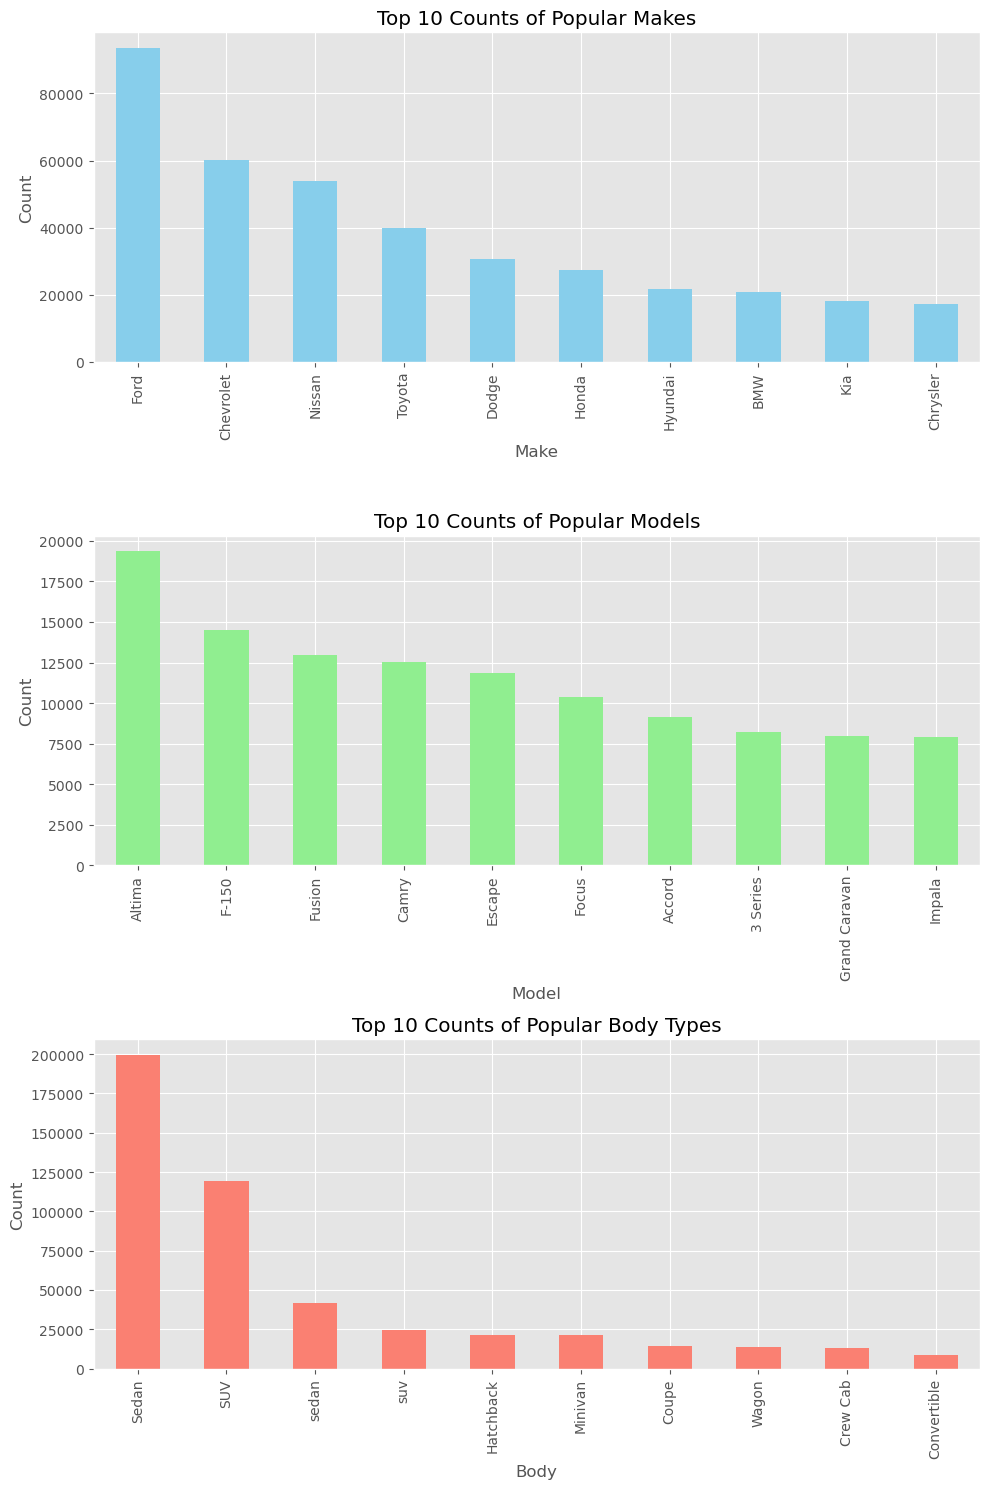

In [114]:
#Question 1 


#Create bar graph to show data
fig, axs = plt.subplots(3, 1, figsize=(10, 15))


top_10_makes = popular_makes.head(10)
top_10_models = popular_models.head(10)
top_10_body = popular_body.head(10)


top_10_makes.plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title('Top 10 Counts of Popular Makes')
axs[0].set_xlabel('Make')
axs[0].set_ylabel('Count')


top_10_models.plot(kind='bar', ax=axs[1], color='lightgreen')
axs[1].set_title('Top 10 Counts of Popular Models')
axs[1].set_xlabel('Model')
axs[1].set_ylabel('Count')


top_10_body.plot(kind='bar', ax=axs[2], color='salmon')
axs[2].set_title('Top 10 Counts of Popular Body Types')
axs[2].set_xlabel('Body')
axs[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [117]:
#Question 2

#Total number of automatic transmission vs automatic
transmission_counts = data['transmission'].value_counts()
count_automatic = transmission_counts.get('automatic')
count_manual = transmission_counts.get('manual')
print(f"Automatic: {count_automatic}")
print(f"Manual: {count_manual}")

#Create new dataframe for automatic and manual
transmission_df = pd.DataFrame(transmission_counts)
filtered_transmission_df = transmission_df.loc[['manual', 'automatic']]
print(filtered_transmission_df)

Automatic: 475915
Manual: 17544
               count
transmission        
manual         17544
automatic     475915


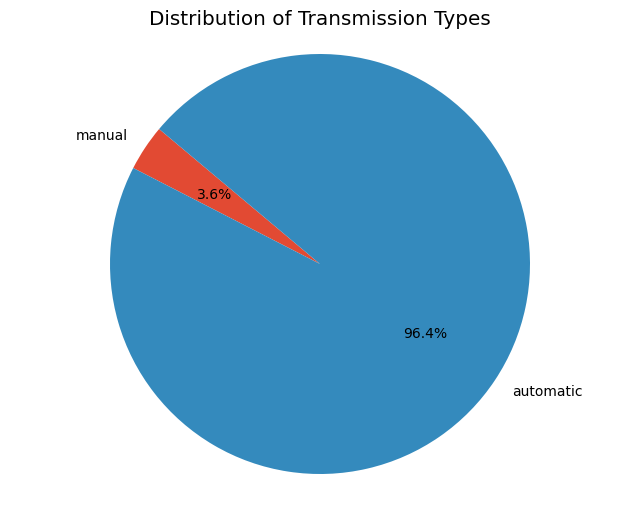

In [118]:
#Question 2 Graph

plt.figure(figsize=(8, 6))
plt.pie(filtered_transmission_df['count'], labels=filtered_transmission_df.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Transmission Types')
plt.axis('equal')
plt.show()

In [119]:
#Question 3


most_popular_make = []
most_popular_model = []
most_popular_make_count = []
most_popular_model_count = []

# Iterate over unique years
for year in data['year'].unique():
    # Filter data for the current year
    year_data = data[data['year'] == year]
    
    # Calculate counts for each make and model for the current year
    make_counts = year_data['make'].value_counts()
    model_counts = year_data['model'].value_counts()
    
    # Get the most popular make and model for the current year
    most_popular_make.append(make_counts.idxmax() if not make_counts.empty else None)
    most_popular_model.append(model_counts.idxmax() if not model_counts.empty else None)
    
    # Get the count of the most popular make and model for the current year
    most_popular_make_count.append(make_counts.max() if not make_counts.empty else 0)
    most_popular_model_count.append(model_counts.max() if not model_counts.empty else 0)

# Create DataFrame with most popular make, model, and count for each year
most_popular = pd.DataFrame({
    'year': data['year'].unique(), 
    'make': most_popular_make, 
    'model': most_popular_model, 
    'make count': most_popular_make_count,
    'model count': most_popular_model_count
})

# Sort the DataFrame by the 'year' column in ascending order
most_popular.sort_values(by='year', inplace=True)

print(most_popular)

    year       make     model  make count  model count
32  1982       None      None           0            0
33  1983       None      None           0            0
31  1984  chevrolet  corvette           1            1
29  1985  chevrolet  corvette           2            2
28  1986   mercedes    420sel           1            1
21  1987   mercedes      300e           1            1
30  1988       None      None           0            0
25  1989     toyota      300e           2            2
27  1990      Honda    Accord          10           10
26  1991     Toyota     Camry          15           10
24  1992     Toyota    Accord          31           22
23  1993     Toyota     Camry          48           30
22  1994      Honda    Accord          68           59
18  1995     Toyota     Camry         117           51
19  1996     Toyota    Accord         133           56
20  1997       Ford    Accord         223           92
17  1998      Honda    Accord         283          172
16  1999  

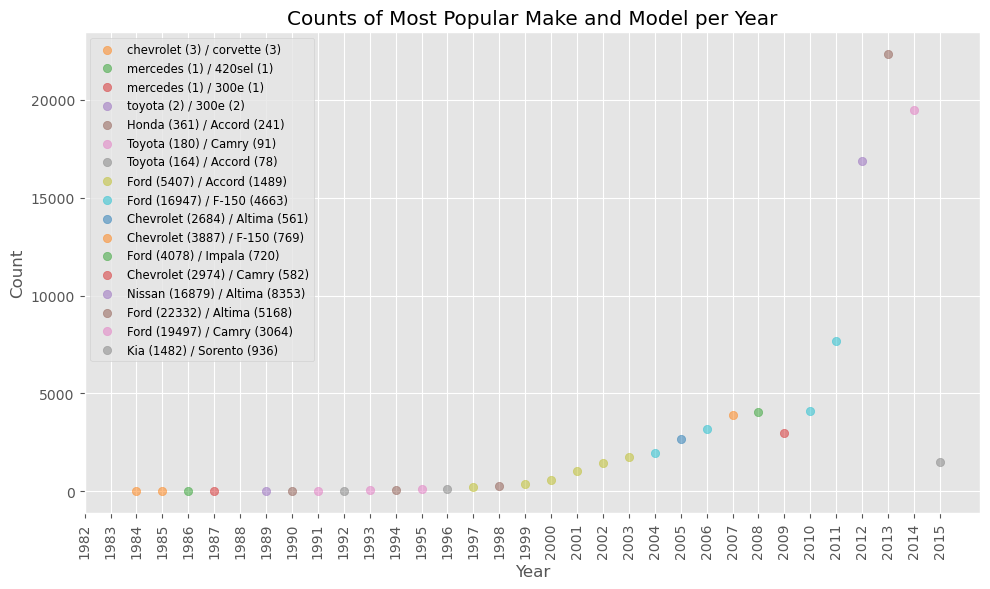

In [120]:
#Question 3 Graph

plt.figure(figsize=(10, 6))

# Get unique combinations of make and model
unique_combinations = most_popular[['make', 'model']].drop_duplicates().reset_index(drop=True)

# Assign a unique color for each combination
colors = plt.cm.tab10.colors[:len(unique_combinations)]

# Create scatter plot with different colors for each combination
for index, row in unique_combinations.iterrows():
    combination_data = most_popular[(most_popular['make'] == row['make']) & (most_popular['model'] == row['model'])]
    if not combination_data.empty:
        plt.scatter(combination_data['year'], combination_data['make count'], color=colors[index % len(colors)], alpha=0.5,
                    label=f"{row['make']} ({combination_data['make count'].sum()}) / {row['model']} ({combination_data['model count'].sum()})")

# Set ticks for every year on the x-axis and rotate them by 90 degrees
plt.xticks(most_popular['year'], rotation=90)

# Add legend to the top left corner
plt.legend(loc='upper left', fontsize='small')

plt.title('Counts of Most Popular Make and Model per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [121]:
#Question 4 For Exterior

color_distribution = data['color'].value_counts()
color_distribution

valid_colors = data['color'].apply(lambda x: isinstance(x, str) and x.strip() != '' and not any(c.isdigit() for c in x) and not any(c == '—' for c in x))

# Get value counts of valid colors
color_distribution = data[valid_colors]['color'].value_counts()

# Display the result
print(color_distribution)

color
black        110970
white        106673
silver        83389
gray          82857
blue          51139
red           43569
green         11382
gold          11342
beige          9222
burgundy       8972
brown          6717
orange         2078
purple         1561
off-white      1449
yellow         1285
charcoal        479
turquoise       236
pink             42
lime             15
Name: count, dtype: int64


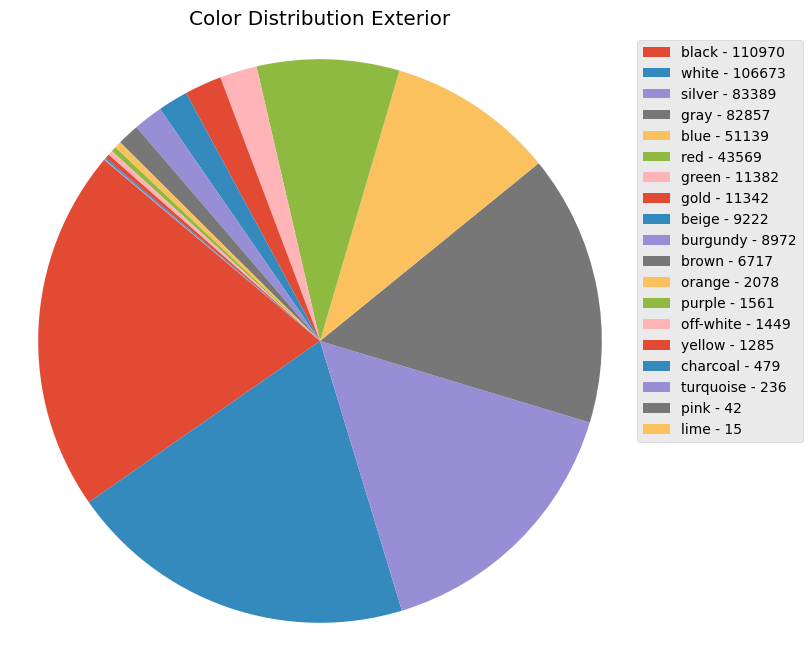

In [122]:
#Question 4 Graph (Exterior Color)

valid_colors = color_distribution[~color_distribution.index.str.contains("—")]

# Create a pie chart
plt.figure(figsize=(8, 8))
patches, _ = plt.pie(valid_colors, startangle=140)
plt.title('Color Distribution Exterior')

# Create legend with color counts
labels = ['{} - {}'.format(label, count) for label, count in zip(valid_colors.index, valid_colors.values)]
plt.legend(patches, labels, loc="best", bbox_to_anchor=(1, 1))

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [123]:
#Question 4 For interior 
color_distribution = data['interior'].value_counts()
color_distribution

valid_interior = data['interior'].apply(lambda x: isinstance(x, str) and x.strip() != '' and not any(c == '—' for c in x))

# Get value counts of valid interior colors
interior_distribution = data[valid_interior]['interior'].value_counts()

# Display the result
print(interior_distribution)

interior
black        244329
gray         178581
beige         59758
tan           44093
brown          8640
red            1363
blue           1143
silver         1104
off-white       480
purple          339
gold            324
white           256
green           245
burgundy        191
orange          145
yellow           20
Name: count, dtype: int64


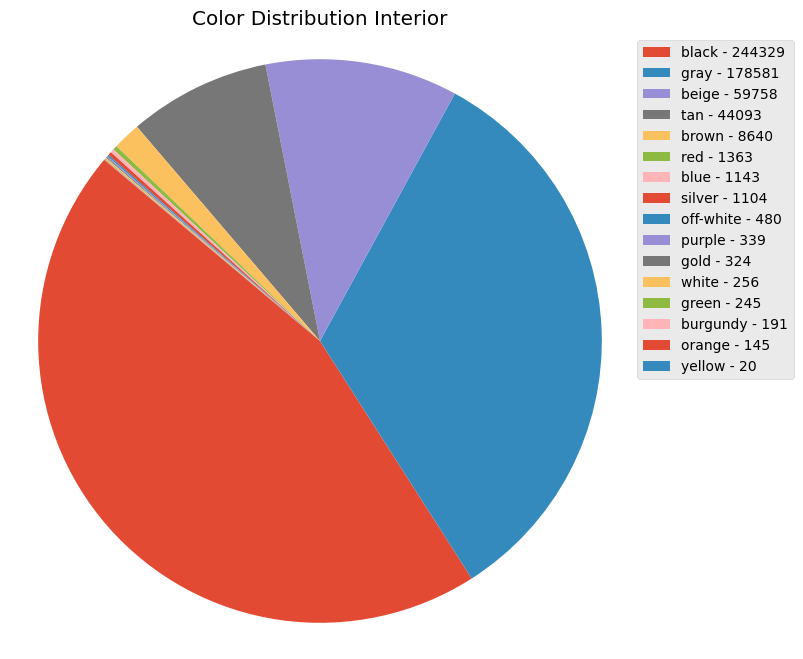

In [124]:
#Question 4 Graph (Interior Color)

# Filter out valid interior colors
valid_interior = data['interior'].apply(lambda x: isinstance(x, str) and x.strip() != '' and not any(c == '—' for c in x))
interior_distribution = data[valid_interior]['interior'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
patches, _ = plt.pie(interior_distribution, startangle=140)
plt.title('Color Distribution Interior')

# Create legend with color counts
labels = ['{} - {}'.format(label, count) for label, count in zip(interior_distribution.index, interior_distribution.values)]
plt.legend(patches, labels, loc="best", bbox_to_anchor=(1, 1))

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [125]:
#Question 5
print(data['sellingprice'])
print(data['odometer'])
data.sort_values(by='odometer', ascending=False)

0         21500.0
1         21500.0
2         30000.0
3         27750.0
4         67000.0
           ...   
558832    33000.0
558833    30800.0
558834    34000.0
558835    11100.0
558836    26700.0
Name: sellingprice, Length: 558837, dtype: float64
0         16639.0
1          9393.0
2          1331.0
3         14282.0
4          2641.0
           ...   
558832    18255.0
558833    54393.0
558834    50561.0
558835    16658.0
558836    15008.0
Name: odometer, Length: 558837, dtype: float64


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,difference,Profit
385721,2014,Kia,Forte,EX,Sedan,automatic,knafx4a8xe5052180,tx,1.0,999999.0,black,black,kia motors finance,11300.0,3100.0,Tue Mar 03 2015 02:30:00 GMT-0800 (PST),996899.0,-8200.0
541034,2007,Pontiac,Grand Prix,Base,sedan,automatic,2g2wp552771212846,ms,1.0,999999.0,blue,black,santander consumer,500.0,600.0,Thu Jun 18 2015 05:02:00 GMT-0700 (PDT),999399.0,100.0
96234,2013,Chevrolet,Cruze,LS,Sedan,NaN,1g1pa5sh2d7251619,tx,1.0,999999.0,silver,black,santander consumer,7975.0,1300.0,Wed Jan 07 2015 04:30:00 GMT-0800 (PST),998699.0,-6675.0
13568,2009,Dodge,Charger,Base,Sedan,automatic,2b3ka43dx9h521300,tx,1.0,999999.0,blue,black,santander consumer,4150.0,5500.0,Thu Jan 08 2015 14:10:00 GMT-0800 (PST),994499.0,1350.0
57588,2008,Nissan,Rogue,S,SUV,NaN,jn8as58t48w002423,md,1.0,999999.0,NaN,NaN,wells fargo dealer services,3650.0,275.0,Tue Dec 30 2014 13:00:00 GMT-0800 (PST),999724.0,-3375.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442975,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c56cl673311,ca,29.0,NaN,black,brown,financial services remarketing/rail cars,34700.0,35000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),NaN,300.0
490195,2006,NaN,NaN,NaN,NaN,manual,ja3aj16e16u070827,pr,21.0,NaN,gray,gray,oriental bank,2900.0,1700.0,Thu Jun 04 2015 04:00:00 GMT-0700 (PDT),NaN,-1200.0
527660,2008,Ford,F-150,XLT,supercrew,automatic,1ftpw14v48kd08698,mi,36.0,NaN,black,black,larry hudson chevrolet buick gmc inc,15650.0,16700.0,Thu Jul 02 2015 06:30:00 GMT-0700 (PDT),NaN,1050.0
550569,2010,Chevrolet,Equinox,LT1,suv,NaN,2cnfleew4a6364759,ab,1.0,NaN,blue,black,go auto finance,8550.0,6750.0,Thu Jun 18 2015 04:30:00 GMT-0700 (PDT),NaN,-1800.0


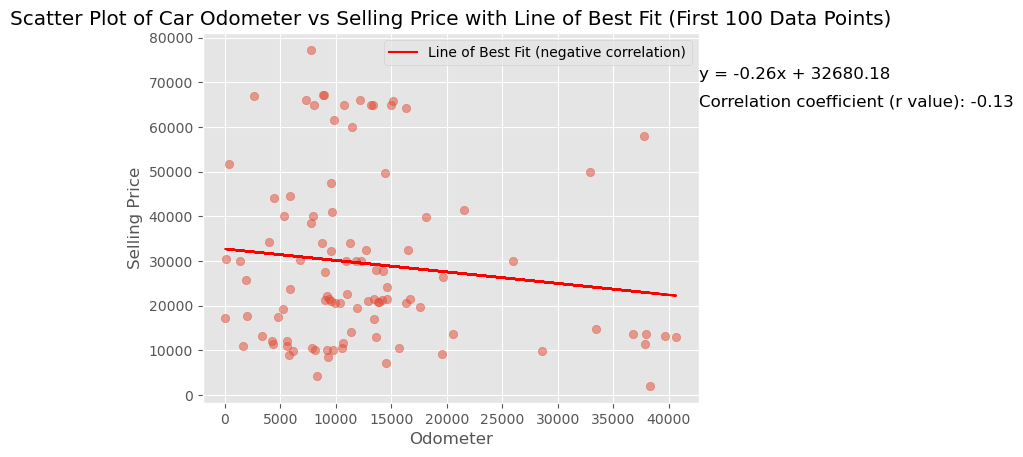

In [139]:
#Question 5 Graph

# Subset of data
data_subset = data.head(100)

# Scatter plot
plt.scatter(data_subset['odometer'], data_subset['sellingprice'], alpha=0.5)

# Calculate means
x_mean = data_subset['odometer'].mean()
y_mean = data_subset['sellingprice'].mean()

# Calculate slope
numerator = sum((data_subset['odometer'] - x_mean) * (data_subset['sellingprice'] - y_mean))
denominator = sum((data_subset['odometer'] - x_mean) ** 2)
slope = numerator / denominator

# Calculate intercept
intercept = y_mean - slope * x_mean

# Determine correlation direction
correlation_direction = "positive" if slope > 0 else "negative"

# Plot line of best fit
plt.plot(data_subset['odometer'], slope * data_subset['odometer'] + intercept, color='red', label=f'Line of Best Fit ({correlation_direction} correlation)')

# Calculate correlation coefficient (r value)
r_value = data_subset['odometer'].corr(data_subset['sellingprice'])
r_text = f'Correlation coefficient (r value): {r_value:.2f}'

# Equation of the line
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'

# Position of the equation text
text_x = max(data_subset['odometer']) * 1.05
text_y = max(data_subset['sellingprice']) * 0.95

# Plot the equation text
plt.text(text_x, text_y, equation_text, fontsize=12, verticalalignment='top')

# Position of the correlation coefficient text
correlation_text_y = text_y - 6000

# Plot the correlation coefficient text
plt.text(text_x, correlation_text_y, r_text, fontsize=12, verticalalignment='top')

# Set title, labels, and legend
plt.title('Scatter Plot of Car Odometer vs Selling Price with Line of Best Fit (First 100 Data Points)')
plt.xlabel('Odometer')
plt.ylabel('Selling Price')
plt.ticklabel_format(style='plain')
plt.legend()

# Show plot
plt.show()

In [127]:
#Question 6

#Calculate profit by Makes
data['Profit'] = data['sellingprice']- data['mmr']
profit_by_make = data.groupby('make')["Profit"].sum()
data['Profit']

0         1000.0
1          700.0
2        -1900.0
3          250.0
4         1000.0
           ...  
558832   -2300.0
558833     600.0
558834    4200.0
558835   -4000.0
558836   -2900.0
Name: Profit, Length: 558837, dtype: float64

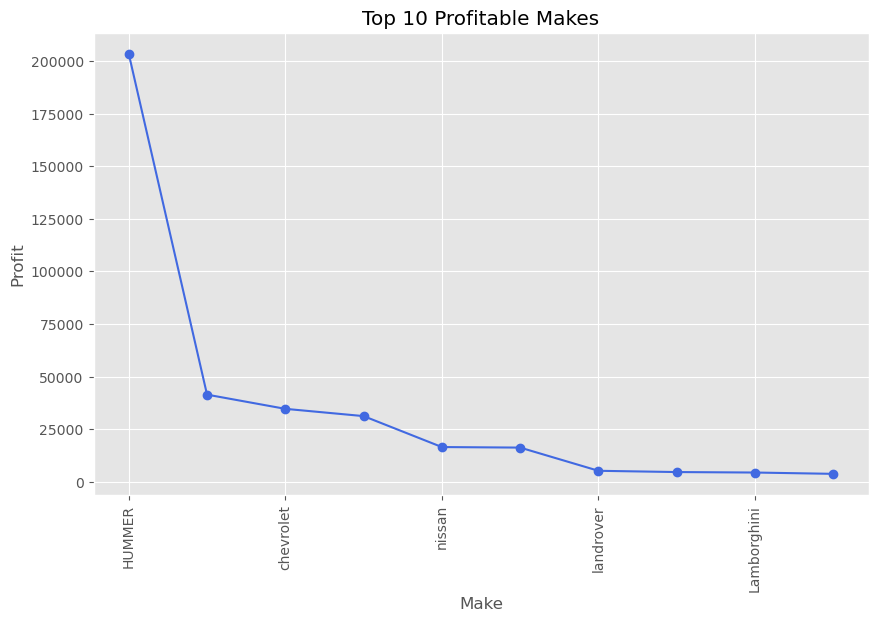

In [128]:
#Question 6 Graph

#Plot line graph to show total profit for top 10 Car Makes
profit_by_make_sorted = profit_by_make.sort_values(ascending=False)
top_10_profitable_makes = profit_by_make_sorted.head(10)

plt.figure(figsize=(10, 6))
top_10_profitable_makes.plot(kind='line', marker='o', color='royalblue')
plt.title('Top 10 Profitable Makes')
plt.xlabel('Make')
plt.ylabel('Profit')
plt.xticks(rotation=90)
plt.grid(True)  
plt.show()

In [129]:
#Question 7

#Median selling price based on make of car
median_selling_price_by_make = data.groupby(['make'])['sellingprice'].median()

print(median_selling_price_by_make)


make
Acura           14900.0
Aston Martin    51000.0
Audi            18500.0
BMW             20100.0
Bentley         62250.0
                 ...   
subaru           3450.0
suzuki           3500.0
toyota           5800.0
volkswagen       3550.0
vw              15500.0
Name: sellingprice, Length: 96, dtype: float64


In [130]:
#Question 7

#Calculate the average median selling price across all car makes
average_median = median_selling_price_by_make.mean()

print(f"The average of the median selling prices across all car makes is: ${average_median:.2f}")

The average of the median selling prices across all car makes is: $16796.23


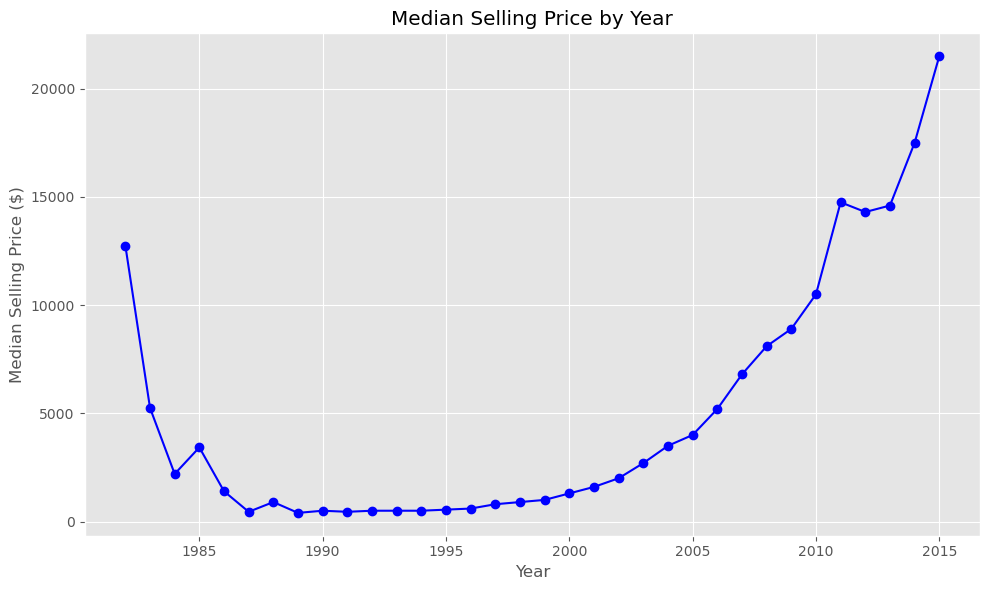

In [131]:
#Question 7 Graph

#Create line graph showing the median selling price by year
median_selling_price_per_year = data.groupby('year')['sellingprice'].median()

plt.figure(figsize=(10, 6))
plt.plot(median_selling_price_per_year.index, median_selling_price_per_year.values, marker='o', color='b')
plt.title('Median Selling Price by Year')
plt.xlabel('Year')
plt.ylabel('Median Selling Price ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

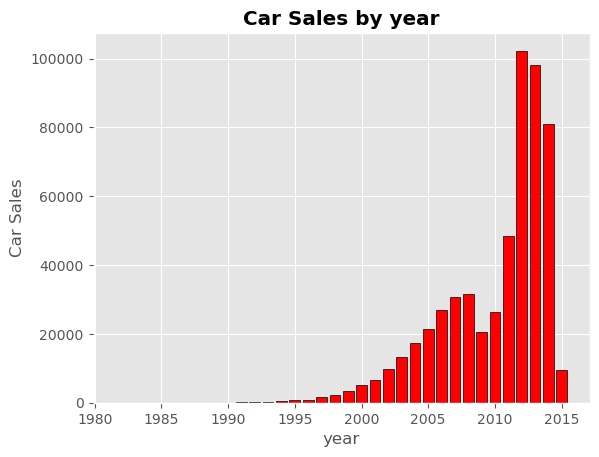

In [132]:
#Question 8

#Compare cars sales against the year it was sold in 
year_sales = data['year'].value_counts().sort_index()

plt.style.use('ggplot')
plt.title('Car Sales by year', fontweight = 'bold')
plt.bar(year_sales.index, year_sales.values, color = 'red', edgecolor = 'black')
plt.xlabel('year')
plt.ylabel('Car Sales');

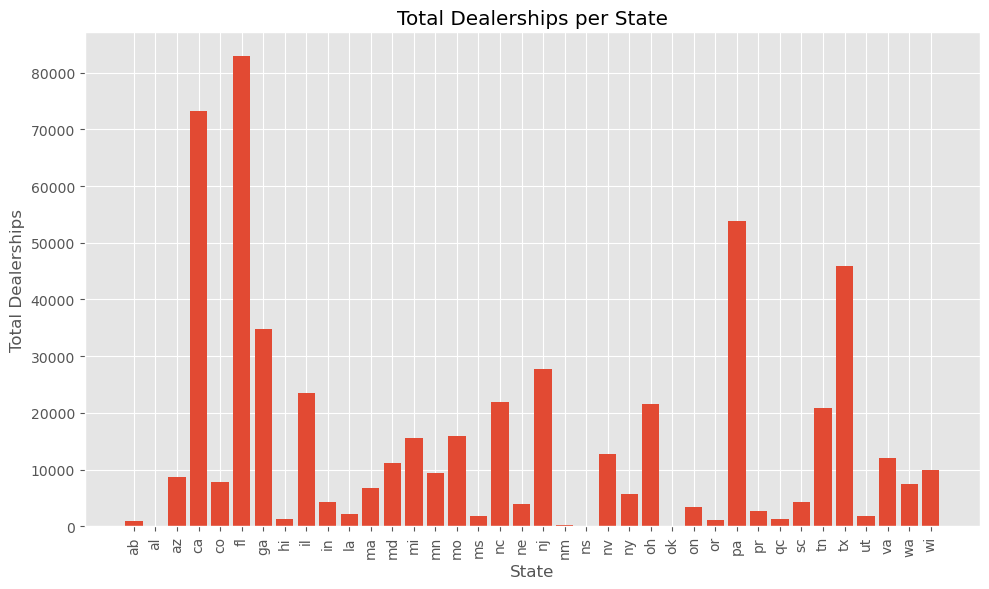

In [133]:
#Question 9

prices_filtered = data[data['state'].str.len() == 2]

# Group by 'state' to get the count of dealerships per state
dealership_count_per_state = prices_filtered.groupby('state').size().reset_index(name='total_dealerships')

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(dealership_count_per_state['state'], dealership_count_per_state['total_dealerships'])
plt.xlabel('State')
plt.ylabel('Total Dealerships')
plt.title('Total Dealerships per State')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
